In [2]:
import settings
import os
from emoji import Emoji, EmojiOutputFormat
import numpy as np
from helper import *
from sklearn import metrics, decomposition
import random

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

2022-12-12 17:35:41,217 [INFO]: Logging is now in charge of logging.


[INFO] Settings: Start initializing.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Reading from file.
[INFO] Settings: Performing integrity check.
[INFO] Settings: New config file generated.
[INFO] Settings: Apply environment variable.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.data, skipping creation.
[INFO] Settings: ROOT_DIR - /home/loe/Projects/STATS-304/GP
[INFO] Settings: CONFIG_DIR - /home/loe/Projects/STATS-304/GP/.config/
[INFO] Settings: DATA_DIR - /home/loe/Projects/STATS-304/GP/.data
[INFO] Settings: LOG_LEVEL - DEBUG
[INFO] Settings: Finish initializing.


2022-12-12 17:35:41.838115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 17:35:42.677322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-12 17:35:42.677450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-12 17:35:42.677461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
# Change how you want the data loo like
# X,y = RGB_and_PCA_load()
# X,y = grayscale_and_resize_load()
# X,y = grayscale_enlarge_and_shrink()
# X,y = RGBA_enlarge_and_shrink()
# X,y = grayscale_and_resize_load_small()
X,y = RGBA_enlarge_and_shrink_large()

In [5]:
# random.shuffle(iris) # This thing breaks list. I do not know why.
X_new = X.copy()
y_new = y.copy()
sequence = []
random.seed(114)
while len(sequence) != X.shape[0]:
    i = random.randint(0,X.shape[0]-1)
    if i not in sequence:
        sequence.append(i)
#print(sequence)
for i_ind, i_val in enumerate(X):
    X_new[sequence[i_ind]] = i_val
    y_new[sequence[i_ind]] = y[i_ind]
X = X_new.copy()
y = y_new.copy()

In [6]:
# Visualize input data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (6226, 1296)
y shape: (6226,)


In [7]:
portion = 0.3
num_of_train = int(X.shape[0]*(1-portion))
X_train = X[:num_of_train]
y_train = y[:num_of_train]
X_test = X[num_of_train:]
y_test = y[num_of_train:]

In [24]:
## NN
# Layout the model
input_dim = X.shape[1]
hidden_layers = 40
hidden_nodes = 1000

with tf.device('/CPU:0'):
    model = tf.keras.models.Sequential()

    model.add(Dense(hidden_nodes, activation = "relu", input_dim=input_dim))
    for i in range(int(hidden_layers)):
        model.add(Dense(hidden_nodes, activation = "relu"))

    model.add(Dense(1,activation = "sigmoid"))

    model.summary()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss="mse", metrics="mse")
    print("Finish compiling")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 1000)              1297000   
                                                                 
 dense_107 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_108 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_109 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_110 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_111 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_112 (Dense)           (None, 1000)             

In [25]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
        baseline=None, restore_best_weights = True
    )
with tf.device('/CPU:0'):
    history = model.fit(X_train, y_train, batch_size = 32, epochs=1000, validation_split=0.2,verbose=True, callbacks=callback)

Epoch 1/1000
109/109 [==============================] - 28s 203ms/step - loss: 0.1680 - mse: 0.1680 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 2/1000
109/109 [==============================] - 22s 198ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.1606 - val_mse: 0.1606
Epoch 3/1000
109/109 [==============================] - 22s 199ms/step - loss: 0.1187 - mse: 0.1187 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 4/1000
109/109 [==============================] - 22s 197ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 5/1000
109/109 [==============================] - 21s 197ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 6/1000
109/109 [==============================] - 22s 199ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 7/1000
109/109 [==============================] - 21s 197ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 8/1000
109/109 [===================

In [26]:
print(history.history)

{'loss': [0.16795973479747772, 0.16622644662857056, 0.11868125200271606, 0.0817779079079628, 0.053294964134693146, 0.033067505806684494, 0.015267955139279366, 0.008629596792161465, 0.00625374261289835, 0.004224629607051611, 0.0037121225614100695, 0.002755321329459548, 0.0014967384049668908, 0.0010309135541319847, 0.0007761180750094354, 0.000569958530832082], 'mse': [0.16795973479747772, 0.16622644662857056, 0.11868125200271606, 0.0817779153585434, 0.053294964134693146, 0.033067505806684494, 0.015267955139279366, 0.008629596792161465, 0.00625374261289835, 0.004224629607051611, 0.0037121225614100695, 0.002755321329459548, 0.0014967384049668908, 0.0010309135541319847, 0.0007761180750094354, 0.000569958530832082], 'val_loss': [0.16515138745307922, 0.1605515331029892, 0.10450459271669388, 0.07267051935195923, 0.061539292335510254, 0.0493716336786747, 0.03831411525607109, 0.03899901360273361, 0.03747882694005966, 0.03438621759414673, 0.03509446233510971, 0.032687313854694366, 0.0319860689342

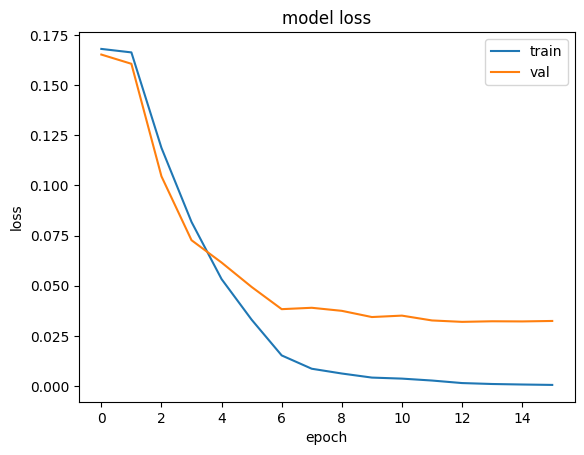

In [27]:
# Visualize the result
"""
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [28]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.flatten())
y_pred_ = y_pred.copy()
for ind, val in enumerate(y_pred):
    if val < 1/3:
        res = 0
    elif val >2/3:
        res = 2
    else:
        res = 1        
    y_pred_[ind] = res
y_pred = y_pred_.astype('int8')
print(y_pred)

59/59 [==============================] - 2s 37ms/step
[9.9709028e-01 9.9688691e-01 9.9703914e-01 ... 3.1777680e-02 2.2897834e-06
 4.2435968e-01]
[2 2 2 ... 0 0 1]


In [29]:
# print(metrics.rand_score(y_test, y_pred))
formatted_y_test = (y_test*2).astype('int8')
print("Confusion Matrix:\n", metrics.confusion_matrix(formatted_y_test, y_pred))
print(f"Accuracy: {np.sum(np.equal(formatted_y_test, y_pred))/y_pred.shape[0]}")

Confusion Matrix:
 [[668  75  16]
 [ 32 543  18]
 [ 12  69 435]]
Accuracy: 0.8811563169164882
